* ML09 ニューラルネットワーク
  * tensorflow をインストールする
  * Google Colab はインストール済み

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from sklearn.datasets import fetch_openml
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# 手書き文字のデータセットをダウンロードして、実験用データを準備 (70000枚のうち7000枚を利用)
mnist_data = fetch_openml('mnist_784', version=1)
_x = np.array(mnist_data['data'].astype(np.float32))
_y = np.array(mnist_data['target'].astype(np.int32))
_, x, _, y = train_test_split(_x, _y, test_size=0.1, random_state=1)

# 特徴量は 0-1 の範囲に正規化、ターゲットは one-hot ベクトル化
x = x / 255
print(x[0])
y = np.identity(10)[y]
print(y[:3])

# データを学習用と検証用に分割
x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, random_state=1) # 検証用データに25%を割当て
print(f'x_train:{len(x_train)} x_test:{len(x_test)} y_train:{len(y_train)} y_test:{len(y_test)}')

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.16862746
 0.5803922  0.7882353  0.99215686 0.99215686 0.7

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 784)               615440    
                                                                 
 dense_5 (Dense)             (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________
mnist_model, accuracy_score: train data : 0.99886  test data : 0.92114
Wall time: 42.5 s


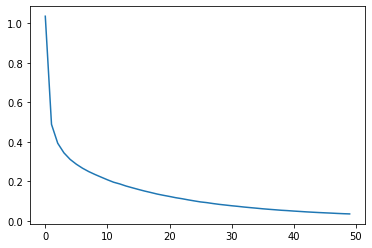

In [5]:
%%time 
# ニューラルネットワークのモデルを作成 (サマリを表示)
mnist_model = tf.keras.models.Sequential(name='mnist_model') # ニューラルネットワークのモデルの箱を用意
mnist_model.add(tf.keras.layers.Dense(input_dim=784, units=784, activation='relu')) # 784入力のセルを784個用意、活性化関数は ReLU
mnist_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) # セルを10個からなる出力層を用意、活性化関数はソフトマックス
mnist_model.summary()  # 作成したモデルの中身を表示

# 学習時の設定を行い、学習を実施 (学習中のlossの変化をグラフで表示)
mnist_model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) # 学習時の損失関数、最適化関数、評価関数を設定
history = mnist_model.fit(x_train, y_train, epochs=50, batch_size=10, verbose=0) # fit関数で学習を実施
plt.plot(history.history['loss']) # 学習中のlossの変化をグラフで表示

# 学習したモデルの性能(正答率)を学習用データと検証用データで評価
train_loss, train_accuracy = mnist_model.evaluate(x_train, y_train, verbose=0)
test_loss, test_accuracy = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f'mnist_model, accuracy_score: train data : {train_accuracy:.5f}  test data : {test_accuracy:.5f}')